# Early Warning Score ML
### An analysis and regression model with Random Forest

This notebook contain a personal analysis of a dataset of patients health data from the Emergency departments of three hospitals in USA, France and Switzerland. These data are not only limited to the common features used to evaluate the EWS (RR, HR, BPs etc.) but also include Lenght of stay (LOS), dyastolic blood pressure (BPD), and some inflamatory markers such as procalcitonin (PCT) and Mid-Regional Pro-Adrenomedullin (MR-proADM).

Some interesting findings are described throughout the notebook.

#### Source:

> Eckart A, Hauser S, Kutz A, Haubitz S, Hausfater P, Amin D, Amin A, Huber A, Mueller B, Schuetz P, Andreas E (2018) Data from: Combination of the National Early Warning Score (NEWS) and inflammatory biomarkers for early risk stratification in emergency department patients: results of a multi-national, observational study. Dryad Digital Repository. https://doi.org/10.5061/dryad.d22q6vh

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
#%matplotlib inline

In [2]:
df = pd.read_csv("data/NEWS_datafile.csv")

In [3]:
df.tail()

,hospital,country,resp_rate,confusion,gender,death30d,SpO2,BPS,BPD,HR,temp,MR-proADM,PCT,discharge location,LOS,age,ICU
1298,Aarau,Switzerland,24,0,f,0,96,145,72.0,70,37.099998,0.8043,0.069014,Home,1.0,63,0
1299,Aarau,Switzerland,34,0,m,0,76,193,123.0,137,36.000000,0.6397,0.036537,Home,7.0,62,0
1300,Aarau,Switzerland,32,0,f,0,72,126,59.0,82,37.700001,3.9680,0.103435,Home,15.0,81,0
1301,Aarau,Switzerland,18,0,m,0,98,162,123.0,82,36.599998,0.5310,0.070668,Home,0.0,62,0
1302,Aarau,Switzerland,40,0,f,0,97,144,86.0,76,37.299999,0.6625,0.036151,Institution,10.0,82,0


In [7]:
data = df[["HR", "temp"]]

In [8]:
print(data)

       HR       temp
0      82  36.400002
1      72  37.000000
2      91  36.700001
3      59  35.599998
4      63  35.700001
...   ...        ...
1298   70  37.099998
1299  137  36.000000
1300   82  37.700001
1301   82  36.599998
1302   76  37.299999

[1303 rows x 2 columns]


In [9]:
data = np.array(data)

In [10]:
print(data)

[[82.         36.40000153]
 [72.         37.        ]
 [91.         36.70000076]
 ...
 [82.         37.70000076]
 [82.         36.59999847]
 [76.         37.29999924]]


In [13]:
hartslag = df[["HR"]]
hartslag = np.array(hartslag)
print(hartslag)

[[82]
 [72]
 [91]
 ...
 [82]
 [82]
 [76]]


In [5]:
klasse = df["ICU"]

klasse = np.array(klasse)
print(klasse)

[0 0 0 ... 0 0 0]


In [11]:
beslissingsboom = tree.DecisionTreeClassifier(criterion="gini")   # boom wordt aangemaakt via gini-index
beslissingsboom.fit(data, klasse)    # boom genereren die overeenkomt met data

DecisionTreeClassifier()

In [28]:
beslissingsboom2 = tree.DecisionTreeClassifier(criterion="gini", max_depth=4)   # boom wordt aangemaakt via gini-index
beslissingsboom2.fit(hartslag, klasse)    # boom genereren die overeenkomt met data

DecisionTreeClassifier(max_depth=4)

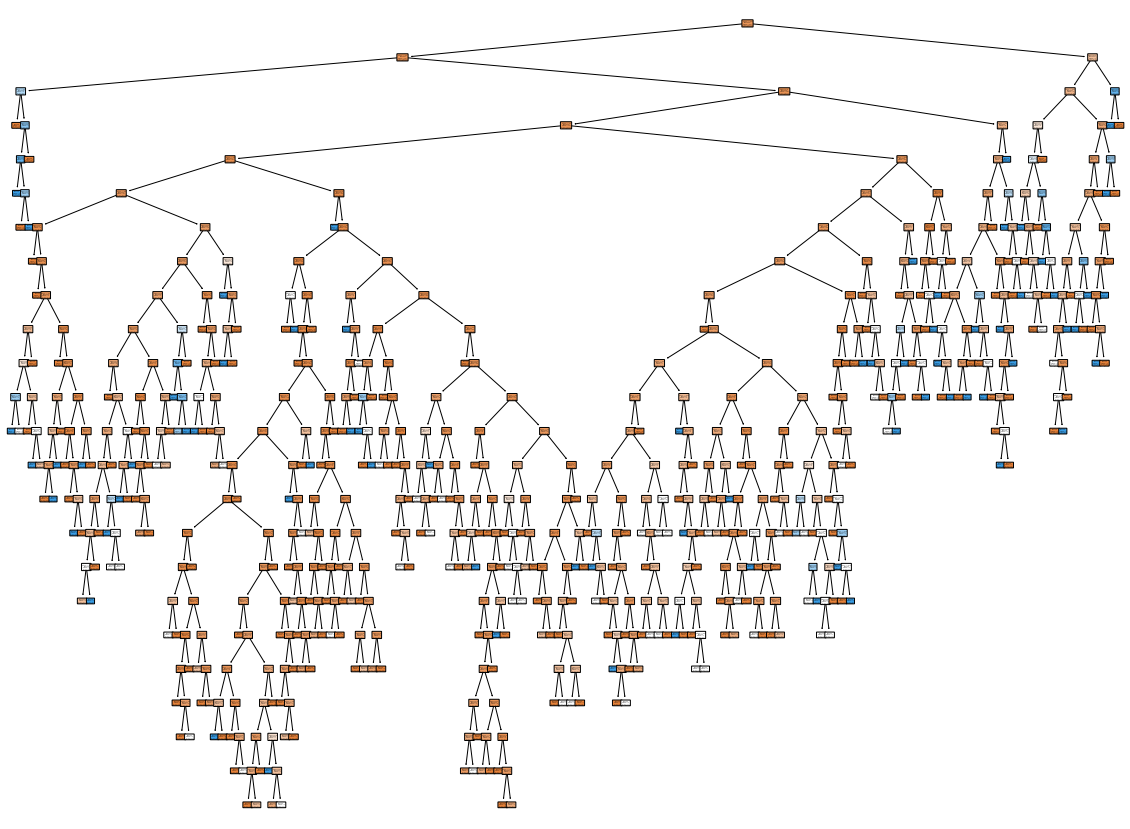

In [12]:
plt.figure(figsize=(20,15))  
tree.plot_tree(beslissingsboom, 
               class_names=["geen ICU", "ICU"], 
               feature_names=["Hartslag", "temp"], 
               filled=True, rounded=True)
plt.show()

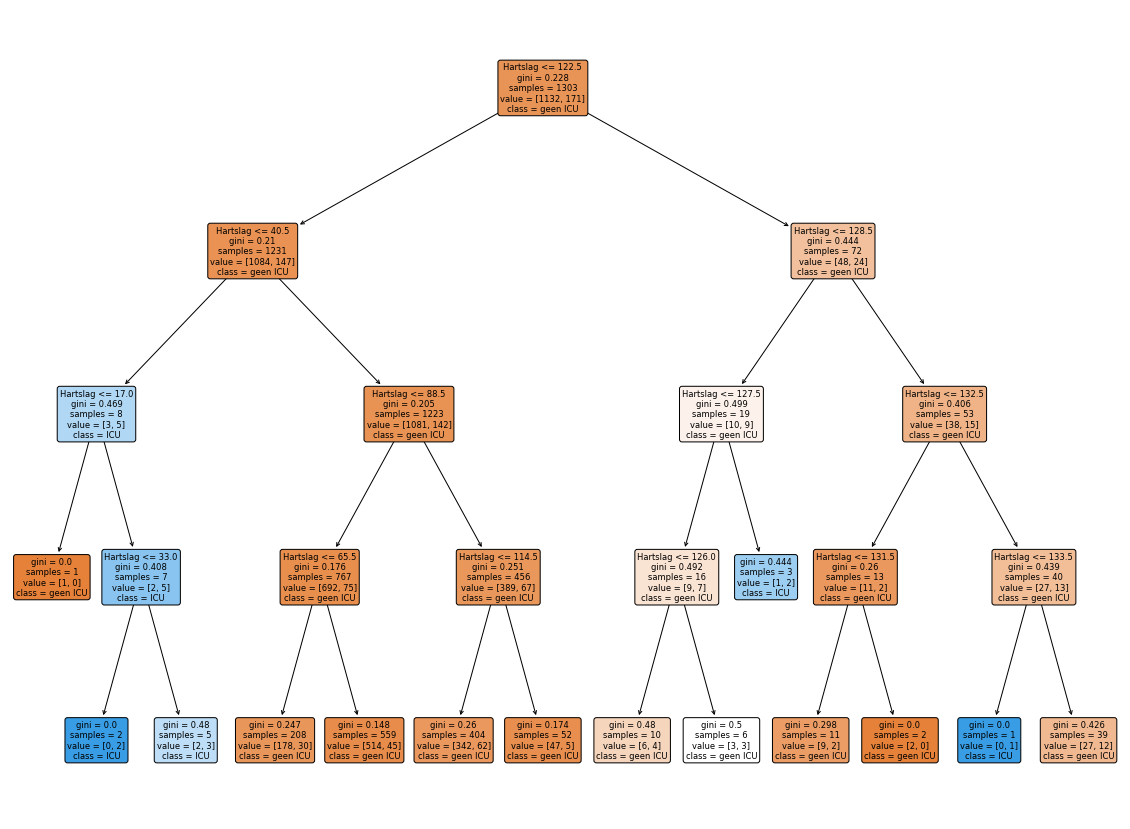

In [29]:
plt.figure(figsize=(20,15))  
tree.plot_tree(beslissingsboom2, 
               class_names=["geen ICU", "ICU"], 
               feature_names=["Hartslag"], 
               filled=True, rounded=True)
plt.savefig("dthr4.png", dpi=500)
plt.show()

The table above show the dataset as provided by BMJ. We can see that we have also informations regarding the location source of the record, the gender of the patient, the discharge location and even the death after 30 days (0 for false and 1 for true). For our analysis, we want to make sure that we are working only with numerical features that's why we are going to manipulate the data to create new features and modify the existing one: e.g. the feature *temp* and *MR-proADM* contain floating numbers which decimal separator is a coma instead of a dot. This will almost certantly create some ambiguity in the data that would be interpreted as a string or object instead of a number.

#### dysambiguation
- BPS = systolic BP
- BPD = dyastolic BP
- LOS = lenght of stay (days)

In [30]:
df = pd.read_csv("data/NEWS_datafile.csv")

In [4]:
df.columns

Index(['hospital', 'country', 'resp_rate', 'confusion', 'gender', 'death30d',
       'SpO2', 'BPS', 'BPD', 'HR', 'temp', 'MR-proADM', 'PCT',
       'discharge location', 'LOS', 'age', 'ICU'],
      dtype='object')

In [5]:
df.dtypes

hospital               object
country                object
resp_rate               int64
confusion               int64
gender                 object
death30d                int64
SpO2                    int64
BPS                     int64
BPD                   float64
HR                      int64
temp                  float64
MR-proADM             float64
PCT                   float64
discharge location     object
LOS                   float64
age                     int64
ICU                     int64
dtype: object

In [31]:
#df.temp = df.temp.str.replace(',','.')
#df['MR-proADM'] = df['MR-proADM'].str.replace(',','.')
#df.PCT = df.PCT.str.replace(',','.')
#df.temp = df.temp.astype('float')
#df['MR-proADM'] = df['MR-proADM'].astype('float')
#df.PCT = df.PCT.astype('float')
df = df.round({'temp':1})

Now that we fixed the datatype of our feature, we can start making some statistical analysis. To do so, let's print a table with our dataset statistics:

In [32]:
df.tail(50)

,hospital,country,resp_rate,confusion,gender,death30d,SpO2,BPS,BPD,HR,temp,MR-proADM,PCT,discharge location,LOS,age,ICU
1253,Hôpital de la Salpêtrière,France,18,0,f,0,98,135,75.0,64,36.6,0.4743,0.192093,Home,0.0,57,0
1254,Hôpital de la Salpêtrière,France,19,0,f,0,100,153,106.0,99,37.3,0.3900,0.069246,Home,0.0,35,0
1255,Hôpital de la Salpêtrière,France,32,0,m,0,91,103,68.0,91,38.6,1.5480,0.072190,Home,8.0,81,0
1256,Hôpital de la Salpêtrière,France,16,0,m,0,97,71,33.0,70,36.5,1.7560,0.058678,Home,19.0,85,0
1257,Hôpital de la Salpêtrière,France,16,0,m,0,99,139,81.0,70,36.8,0.4424,NaN,Home,0.0,47,0
1258,Hôpital de la Salpêtrière,France,20,0,m,0,98,157,109.0,77,36.8,0.4435,1.542627,Home,3.0,34,0
1259,Hôpital de la Salpêtrière,France,32,0,m,0,94,144,109.0,99,36.8,0.5203,0.068029,Home,19.0,42,0
1260,Hôpital de la Salpêtrière,France,22,0,m,0,95,110,69.0,92,36.2,0.4955,0.054397,Home,0.0,55,0
1261,Hôpital de la Salpêtrière,France,24,0,m,0,95,168,108.0,89,36.0,0.3038,5.658838,Home,0.0,31,0
1262,Hôpital de la Salpêtrière,France,30,0,f,0,98,135,79.0,89,36.7,0.6218,0.104898,Home,1.0,72,0


In [ ]:
df.describe()

Considerations:
- count : some of the features contain null values: BPD, MR-proADM, PCT, LOS. However, the number of null values is quite insignificant so a strategy could be to assign to this null values, the mean value of the series.
- mean : well in this case is mostly a curiosity: the majority of patients considered in the study has those values (which by the way are also the "normal-values"). similar considerations are for the min and max and the various percentiles (25%, 50%, 75%).
- std : gives us a glimpse of how heterogeneous are our values.

In [33]:
df['BPD'] = df['BPD'].fillna(df['BPD'].mean())
df['MR-proADM'] = df['MR-proADM'].fillna(df['MR-proADM'].mean())
df['PCT'] = df['PCT'].fillna(df['PCT'].mean())
df['LOS'] = df['LOS'].fillna(df['LOS'].mean())

As you may have noticed in the first table, there is no feature EWS in the dataset. We can engineer a new one using the HSE EWS guidelines applied to our dataset:

In [34]:
# create a new feature for EWS based on the values

EWS_Scores = []
for row in df.itertuples():
    row_ews = []
    
    if row.resp_rate >= 12 and row.resp_rate <= 20:
        row_ews.append(0)
    elif row.resp_rate >= 9 and row.resp_rate <= 11:
        row_ews.append(1)
    elif row.resp_rate >= 21 and row.resp_rate <= 24:
        row_ews.append(2)
    elif row.resp_rate <= 8 or row.resp_rate >= 25:
        row_ews.append(3)
        
    if row.confusion == 1:
        row_ews.append(1)
    elif row.confusion == 0:
        row_ews.append(0)
        
    if row.SpO2 >= 96:
        row_ews.append(0)
    elif row.SpO2 >= 94 and row.SpO2 <= 95:
        row_ews.append(1)
    elif row.SpO2 >= 92 and row.SpO2 <= 93:
        row_ews.append(2)
    elif row.SpO2 <= 91:
        row_ews.append(3)
        
    if row.BPS >= 111 and row.BPS <= 249:
        row_ews.append(0)
    elif row.BPS >= 101 and row.BPS <= 110:
        row_ews.append(1)
    elif row.BPS >= 91 and row.BPS <= 100:
        row_ews.append(2)
    elif row.BPS <= 90 or row.BPS >= 250:
        row_ews.append(3)
        
    if row.HR >= 51 and row.HR <= 90:
        row_ews.append(0)
    elif (row.HR >= 41 and row.HR <= 50) or (row.HR >= 91 and row.HR <= 110):
        row_ews.append(1)
    elif row.HR >= 111 and row.HR <= 130:
        row_ews.append(2)
    elif row.HR <= 40 or row.HR >= 131:
        row_ews.append(3)
        
    if row.temp >= 36.1 and row.temp <= 38.0:
        row_ews.append(0)
    elif (row.temp >= 35.1 and row.temp <= 36) or (row.temp >= 38.1 and row.temp <= 39.0):
        row_ews.append(1)
    elif row.temp >= 39.1:
        row_ews.append(2)
    elif row.temp <= 35:
        row_ews.append(3)
        
    if len(row_ews) == 6:
        EWS_Scores.append(row_ews)
    else:
        print('error:', len(row_ews))
        break

In [35]:
ews_list = []
for scores in EWS_Scores:
    ews = sum(scores)
    ews_list.append(ews)

df['EWS'] = ews_list

In [36]:
df.head()

,hospital,country,resp_rate,confusion,gender,death30d,SpO2,BPS,BPD,HR,temp,MR-proADM,PCT,discharge location,LOS,age,ICU,EWS
0,Clearwater Hospital,USA,22,0,m,0,93,158,88.0,82,36.4,1.677191,0.117062,Home,2.0,68,0,4
1,Clearwater Hospital,USA,20,0,m,0,98,164,102.0,72,37.0,0.636032,0.077208,Home,2.0,61,0,0
2,Clearwater Hospital,USA,18,1,f,1,100,166,88.0,91,36.7,1.021181,0.119181,Institution,10.0,78,0,2
3,Clearwater Hospital,USA,17,0,m,0,98,148,71.0,59,35.6,2.236069,0.128453,Home,2.0,58,0,1
4,Clearwater Hospital,USA,16,0,m,0,100,194,79.0,63,35.7,0.859614,0.072874,Home,4.0,78,1,1


In [42]:
df.to_csv("nieuw.csv", index=False)

Above, the updated dataset include now a new feature EWS. Below we're going to create dummy features for each categorical feature (for each string/object feature) so that we'll have a dataset containing only numerical features.

In [43]:
ews = pd.read_csv("data/NEWS_datafile_metEWS.csv")

In [44]:
ews

,hospital,country,resp_rate,confusion,gender,death30d,SpO2,BPS,BPD,HR,temp,MR-proADM,PCT,discharge location,LOS,age,ICU,EWS
0,Clearwater Hospital,USA,22,0,m,0,93,158,88.0,82,36.4,1.677191,0.117062,Home,2.0,68,0,4
1,Clearwater Hospital,USA,20,0,m,0,98,164,102.0,72,37.0,0.636032,0.077208,Home,2.0,61,0,0
2,Clearwater Hospital,USA,18,1,f,1,100,166,88.0,91,36.7,1.021181,0.119181,Institution,10.0,78,0,2
3,Clearwater Hospital,USA,17,0,m,0,98,148,71.0,59,35.6,2.236069,0.128453,Home,2.0,58,0,1
4,Clearwater Hospital,USA,16,0,m,0,100,194,79.0,63,35.7,0.859614,0.072874,Home,4.0,78,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Aarau,Switzerland,24,0,f,0,96,145,72.0,70,37.1,0.804300,0.069014,Home,1.0,63,0,2
1299,Aarau,Switzerland,34,0,m,0,76,193,123.0,137,36.0,0.639700,0.036537,Home,7.0,62,0,10
1300,Aarau,Switzerland,32,0,f,0,72,126,59.0,82,37.7,3.968000,0.103435,Home,15.0,81,0,6
1301,Aarau,Switzerland,18,0,m,0,98,162,123.0,82,36.6,0.531000,0.070668,Home,0.0,62,0,0


In [45]:
parameters = ews[["HR", "temp"]]
parameters = np.array(parameters)

In [46]:
klas = ews["EWS"]
klas = np.array(klas)

In [47]:
print(klas)

[4 0 2 ... 6 0 3]


In [48]:
np.max(klas)

14

In [51]:
beslissingsboom3 = tree.DecisionTreeClassifier(criterion="gini",max_depth=4)   # boom wordt aangemaakt via gini-index
beslissingsboom3.fit(parameters, klas)    # boom genereren die overeenkomt met data

DecisionTreeClassifier(max_depth=4)

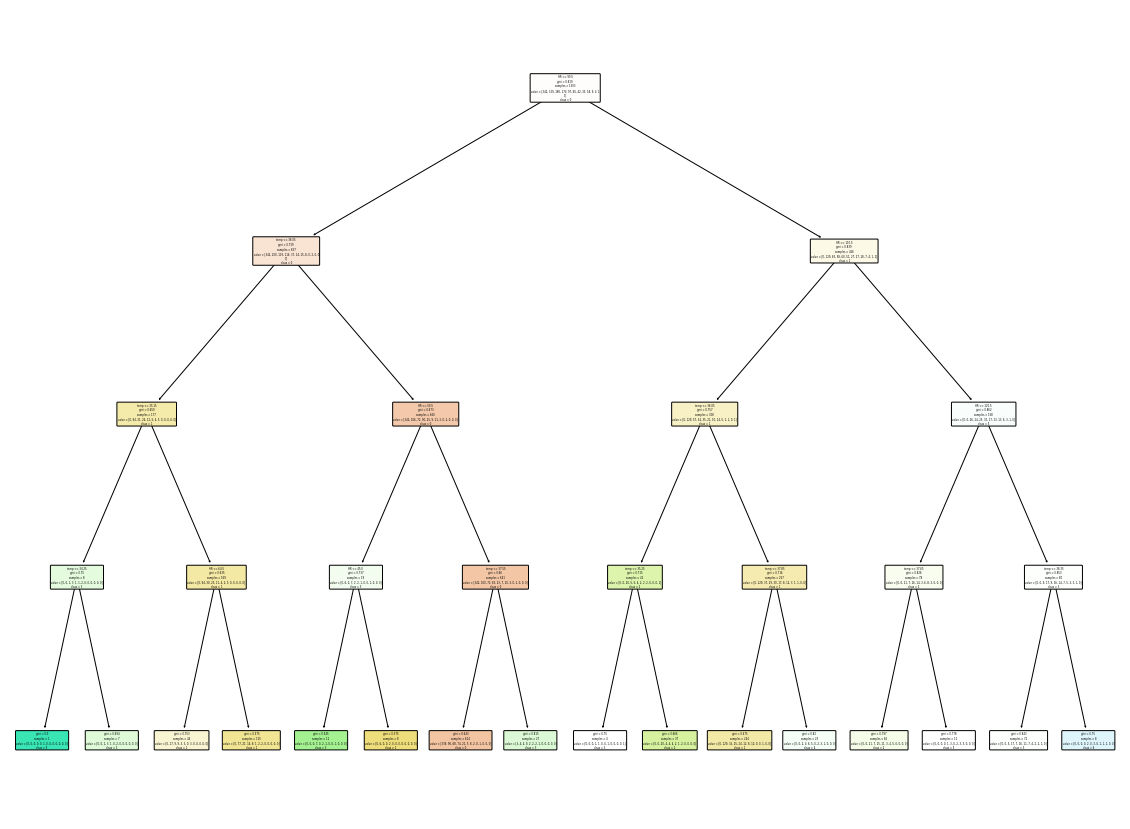

In [52]:
plt.figure(figsize=(20,15))  
tree.plot_tree(beslissingsboom3, 
               class_names=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14"], 
               feature_names=["HR", "temp"], 
               filled=True, rounded=True)
plt.savefig("dthr5.png", dpi=500)
plt.show()

In [12]:
dummy_hospital = pd.get_dummies(df['hospital'])
dummy_country = pd.get_dummies(df['country'])
dummy_gender = pd.get_dummies(df['gender'])
df['discharge location'] = 'discharge_' + df['discharge location']
dummy_discharge = pd.get_dummies(df['discharge location'])
df = df.drop(['hospital','country','gender','discharge location'], axis=1)
df = pd.concat([df,dummy_hospital,dummy_country,dummy_gender,dummy_discharge],axis=1)
df.head()

,resp_rate,confusion,death30d,SpO2,BPS,BPD,HR,temp,MR-proADM,PCT,...,Hôpital de la Salpêtrière,France,Switzerland,USA,f,m,discharge_Home,discharge_Institution,discharge_Other,discharge_Rehab
0,22,0,0,93,158,88.0,82,36.4,1.677191,0.117062,...,0,0,0,1,0,1,1,0,0,0
1,20,0,0,98,164,102.0,72,37.0,0.636032,0.077208,...,0,0,0,1,0,1,1,0,0,0
2,18,1,1,100,166,88.0,91,36.7,1.021181,0.119181,...,0,0,0,1,1,0,0,1,0,0
3,17,0,0,98,148,71.0,59,35.6,2.236069,0.128453,...,0,0,0,1,0,1,1,0,0,0
4,16,0,0,100,194,79.0,63,35.7,0.859614,0.072874,...,0,0,0,1,0,1,1,0,0,0


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5]),
 <a list of 26 Text major ticklabel objects>)

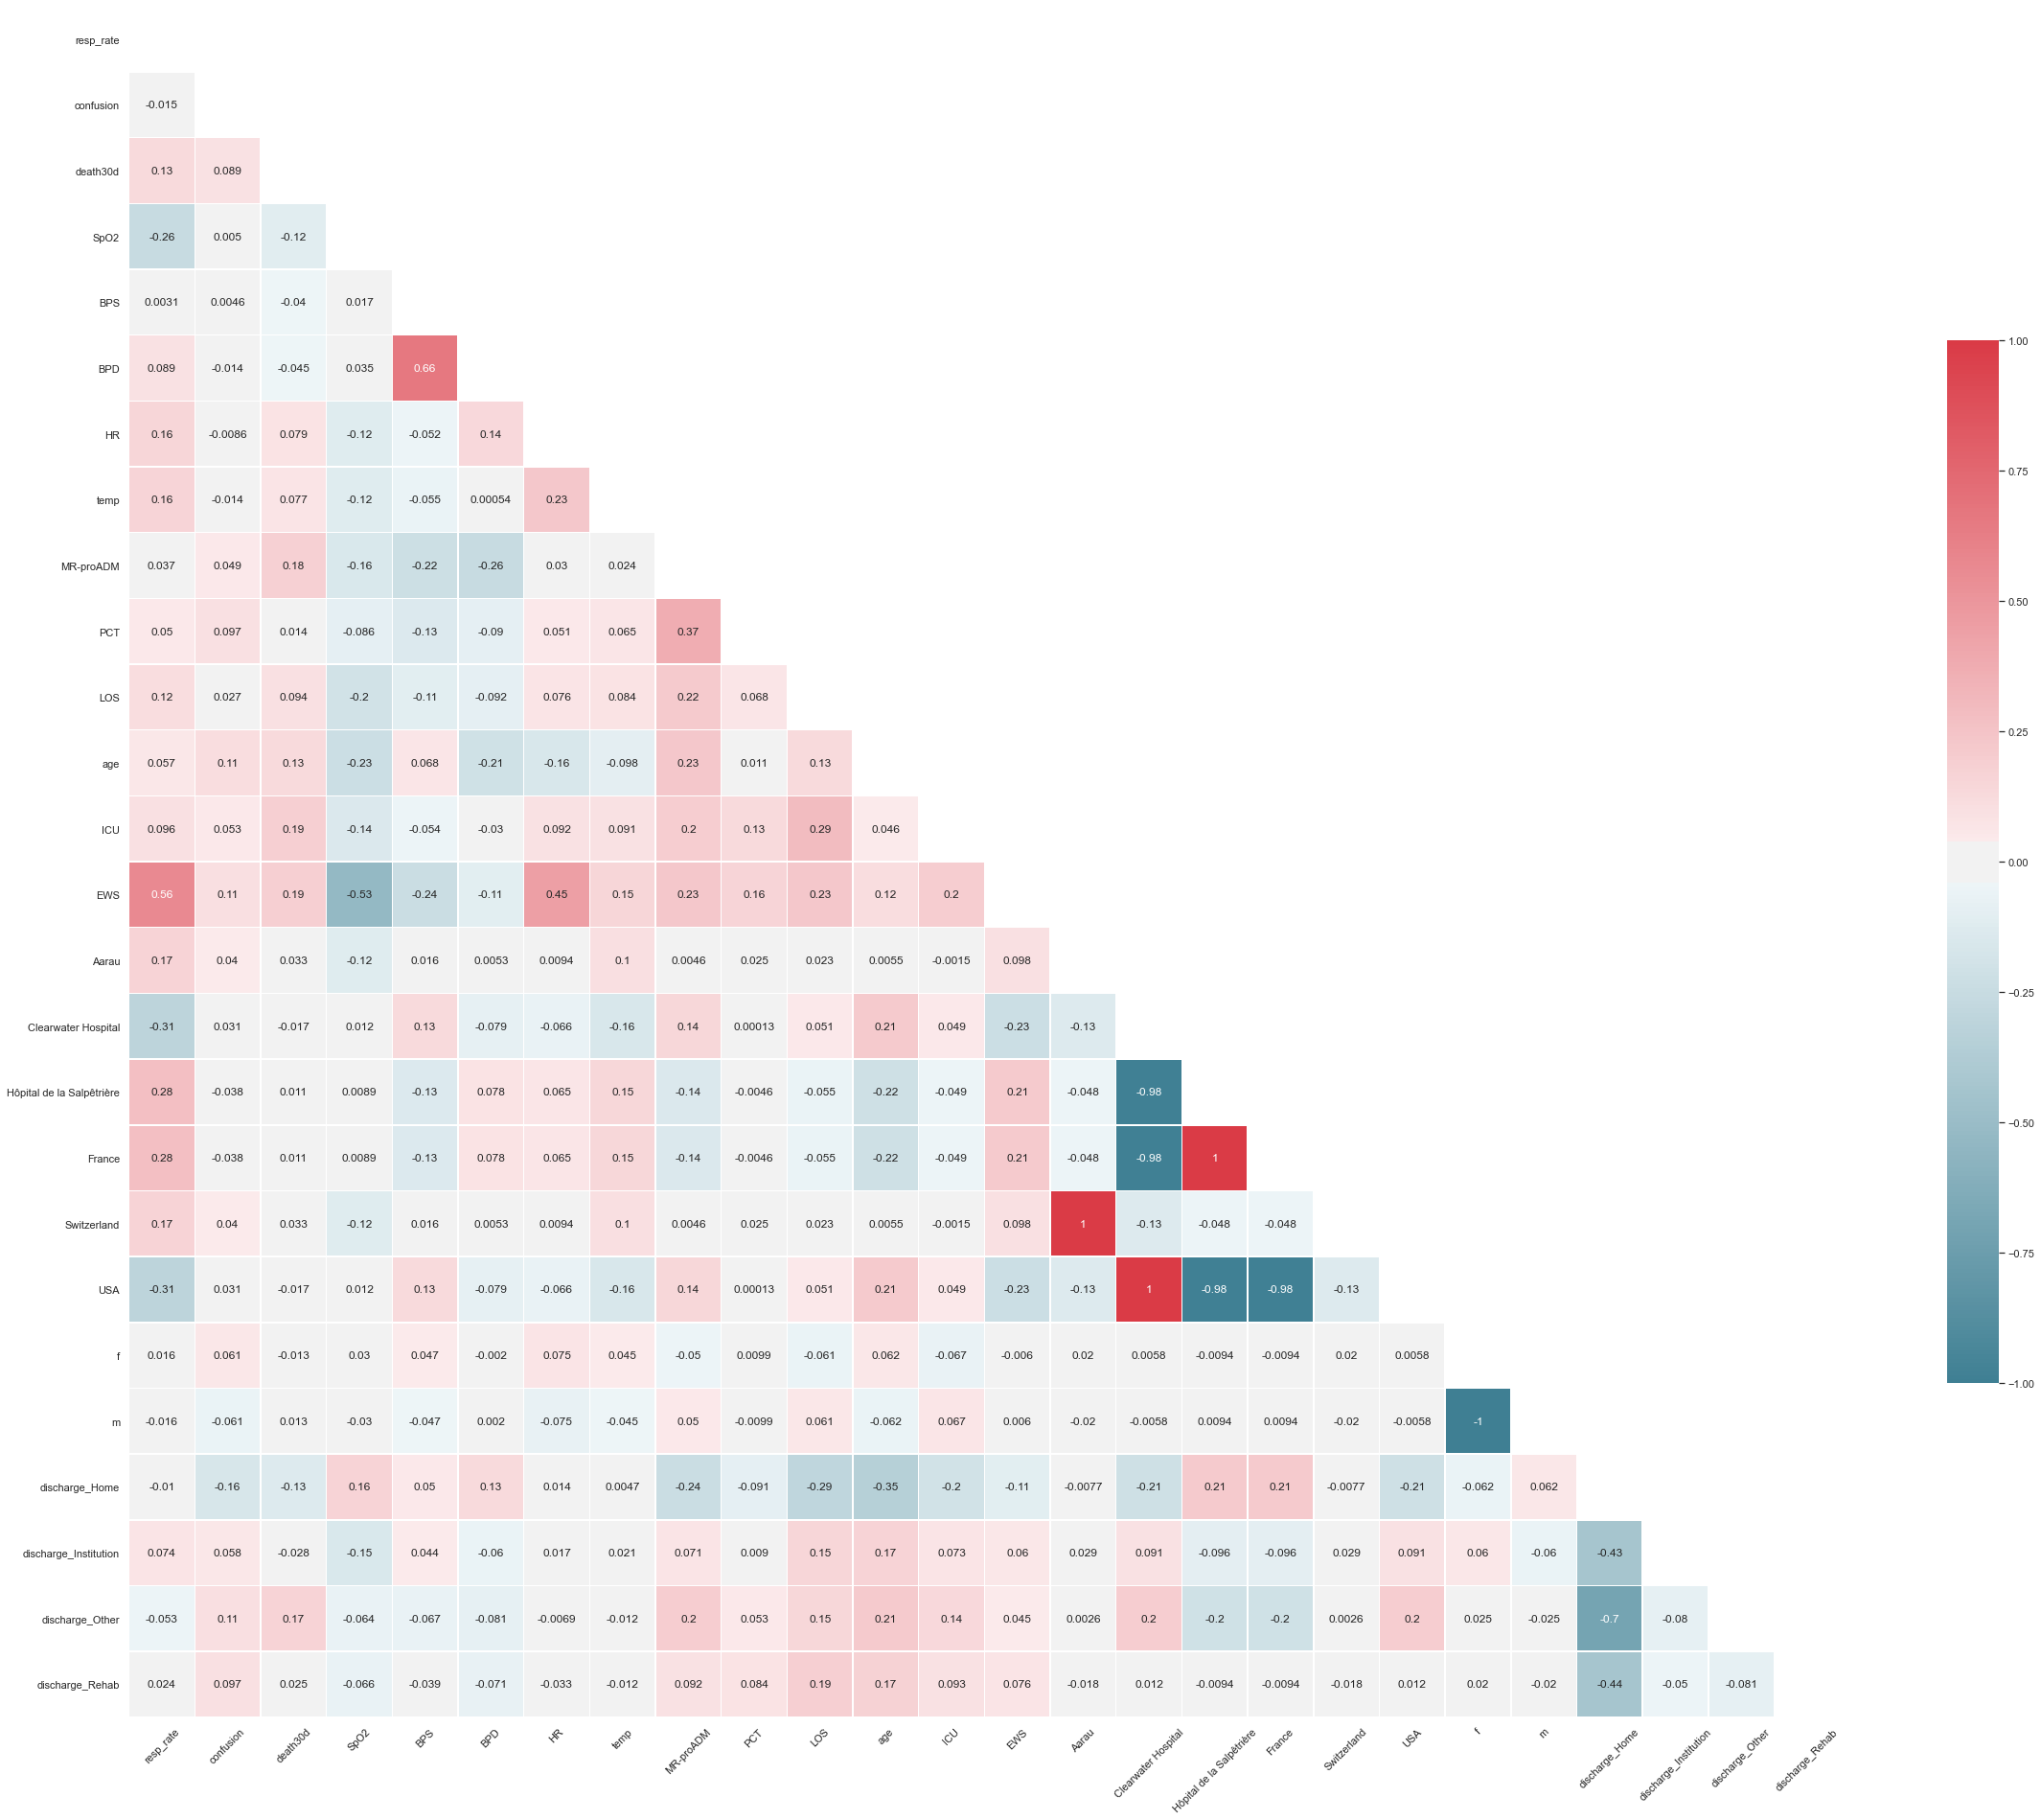

In [13]:
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 40))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

The heatmap above (is a bit cluttered) shows the correlation between all features of our dataset. The values are expressed in percentage thus a value of 1 means 100% correlated while 0 means 0% correlated. This graphical rapresentation is a nice way to spot some interesting correlations such as:
- higher EWS is 20% correlated with death in 30 days
- there is no strong correlation between one of the hospital in the dataset and the death of the patient in 30 days. However the higher correlation is with the Swiss hospital of Aarau.
- etc.

The next chart instead shows the correlation of all features with the EWS of a patient:

Heatmap of correlation of the EWS on the other features


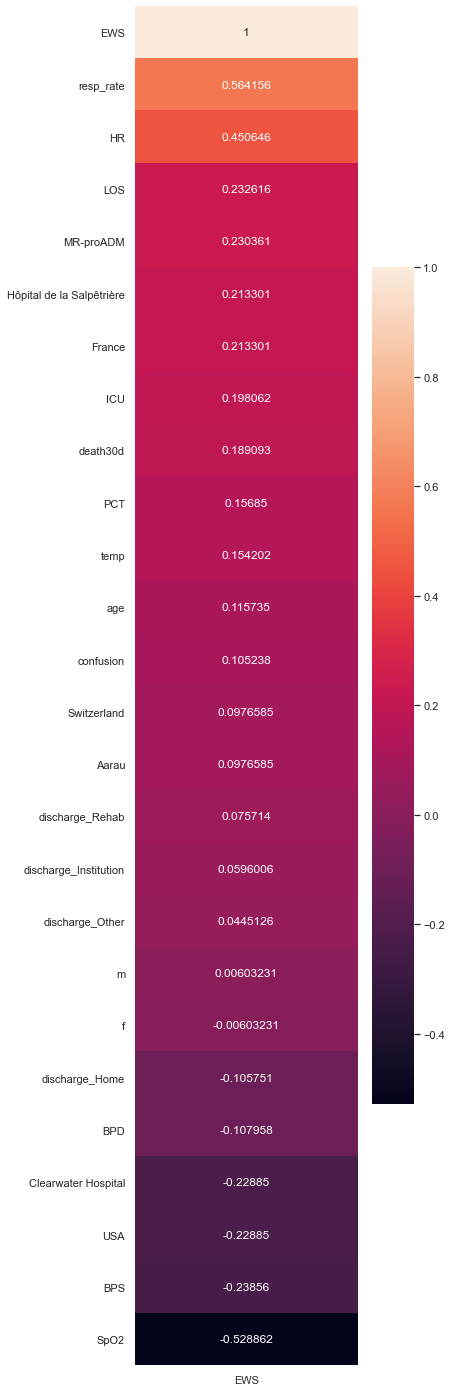

In [14]:
corr_df = df
riskCorr = pd.DataFrame(corr_df.corr()['EWS'])
riskCorr = riskCorr.sort_values('EWS',ascending=False)
plt.figure(figsize=(5, 25))
sns.heatmap(riskCorr, annot=True, fmt="g")
print('Heatmap of correlation of the EWS on the other features')

This chart is very important for our analysis and shows some very interesting findings such as that the most correlated feature to the EWS is the respiratory rate of the patient, followed by Heart rate while Temperature and confusion come after lenght of stay and all the inflamatory markers.

Notice: Systolic Blood pressure and Oxygen saturation are "inversely" correlated because a lower BPS and SpO2 are generally associated with a higher EWS. In percentage we mind the absolute values.

For our predictive model we are not gonna use all the features of our dataset. Those were useful to show some statistics and correlation but not very useful in our model. For this reason we are going to discard info regarding the country and the hospital and the death in 30 days. We'll use all other features (except EWS) to predict the EWS. We'll also split the dataset in 70% training and 30% testing to evaluate how a model trained on 70% of the data perform to predict the EWS of the remaining 30% of the data.

In [15]:
X = df.drop(['USA','Clearwater Hospital','discharge_Home','discharge_Other','discharge_Institution','discharge_Rehab','Aarau','Switzerland','death30d','France','Hôpital de la Salpêtrière','EWS'],axis=1)
y = df['EWS']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
rf_model = RandomForestRegressor()

In [19]:
rf_model.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [20]:
predictions = rf_model.predict(X_test)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
predictions = np.around(predictions)

In [ ]:
df_pred = pd.DataFrame({'real_EWS' : np.array(y_test), 'predicted_EWS' : predictions}).astype('int')
df_pred.head(50)

The table above shows the first 50 real EWS against the predicted EWS.
Below instead the metrics of our model. We can read the variance score as the percentage of accuracy of our model which is pretty high (92%)

In [ ]:
mae = 'MAE: ' + str(metrics.mean_absolute_error(y_test,predictions))
mse = 'MSE: ' + str(metrics.mean_squared_error(y_test,predictions))
rmse = 'RMSE: ' + str(np.sqrt(metrics.mean_squared_error(y_test,predictions)))
variance = 'Variance Score: ' + str(metrics.explained_variance_score(y_test,predictions))
train_metrics = [mae,mse,rmse,variance]
for i in train_metrics:
    print(i)

In [ ]:
%%capture
predictions = cross_val_predict(RandomForestRegressor(),X,y, cv=10)

To be sure, we can run a cross validation of the model using 10 different chunks of train an test of the dataset and see if perform similar. From the metrics we can confirm a 92% of accuracy.

In [ ]:
mae = 'MAE: ' + str(metrics.mean_absolute_error(y,predictions))
mse = 'MSE: ' + str(metrics.mean_squared_error(y,predictions))
rmse = 'RMSE: ' + str(np.sqrt(metrics.mean_squared_error(y,predictions)))
variance = 'Variance Score: ' + str(metrics.explained_variance_score(y,predictions))
train_metrics = [mae,mse,rmse,variance]
for i in train_metrics:
    print(i)

### Additional Considerations:
We have to say that this is just academic: we need a bigger dataset to elaborate a model that will perform accurately in real life. This can be done by using a bigger dataset or by beginning to document EWS on a database system that will store consistently all data.
Furthermore, the random forest regression model is a good model for this exercise but if an higher volume of data is available, the use of more advanced models such as a neural network should be considered.

However, these results clearly show that a EWS predictive model is possible and auspicable to help clinicians to manage their workload, smartly assign resources and deliver a better quality of service to their patients.

I hope I gave you something to think about and maybe to have stimulated your curiosity for machine learning techinques applied to nursing and health care in general. If you have any question, don't hesitate to contact me on Kaggle: https://www.kaggle.com/fabiom91

Have an exciting code!